<a href="https://colab.research.google.com/github/Bazyarmostafa/Data-Science-Projects/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Analysis with SpaCy**

# **Objectives**

**Purpose**: market trends do you want to analyze

**Target** Audience: myself



---


## **1- Data Collection**







In [ ]:
# !pip install beautifulsoup4

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [2]:
url="https://en.wikipedia.org/wiki/Digital_transformation"
respons=requests.get(url)
content=respons.content
soup=BeautifulSoup(content,'html.parser')
# soup


In [4]:
# heading.get_text(strip=True)
# heading.find_next_sibling()
headers=soup.find("h4")
content_text=[]
content=[]

headings = []
paragraphs = []

# Find all headings and paragraphs
for element in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p']):
    if element.name.startswith('h'):  # Check if it's a heading
        headings.append(element.get_text(strip=True))
    elif element.name == 'p':  # Check if it's a paragraph
        paragraphs.append(element.get_text(strip=True))

# Create a DataFrame with headings and paragraphs
data = {'Heading': [], 'Paragraph': []}

# Associate paragraphs with their headings
for heading in headings:
    data['Heading'].append(heading)
    # Collect paragraphs until the next heading appears
    while paragraphs and (len(data['Heading']) == len(data['Paragraph']) + 1):
        data['Paragraph'].append(paragraphs.pop(0))

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Heading,Paragraph
0,Contents,Digital transformation(DT) is the process of a...
1,Digital transformation,The goal for its implementation is to increase...
2,"Benefits, barriers and enablers","the practice of redefining models, functions, ..."
3,Benefits,"However, since there are no comprehensivedata ..."
4,Barriers,While there are approaches which see digital t...
5,Enablers,Adopting digital technology can bring various ...
6,History,There are multiple common barriers that digita...
7,TOP Framework,Somecompany culturescan struggle with the chan...
8,Technology,In addition to the several barriers to digital...
9,Organization,Digitizationis the process of convertinganalog...


In [ ]:
# !pip install nltk

In [10]:
import spacy
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NameError: name 'nltk' is not defined

In [11]:

def extract_keywords(text):
    # Tokenize the text
    words=word_tokenize(text.lower())
    # words = word_tokenize(text.lower())  # Convert to lowercase
    # Filter out non-alphabetic words and stopwords (if needed)
    keywords = [word for word in words if word.isalpha()]  # Modify this to include stopwords if needed
    return keywords

# Apply the function to the DataFrame
df['Keywords'] = df['Paragraph'].apply(extract_keywords)

# Display the DataFrame
# print(df)

# Optionally, count keyword frequency across the DataFrame
all_keywords = [keyword for sublist in df['Keywords'] for keyword in sublist]
keyword_counts = Counter(all_keywords)

# Display keyword counts
print("Keyword Frequency:")
for keyword, count in keyword_counts.items():
  if count>5 and keyword not in ["the","of","that","an","is","by","be","are","and","in","to","a","as"]:
    print(f"{keyword}: {count}")

Keyword Frequency:
digital: 33
transformation: 16
technology: 9
increased: 6
can: 7
workers: 6
companies: 11
technologies: 6
usage: 6


In [14]:
# pip install git+https://github.com/davidadamojr/TextRank.git
!pip install pytextrank

In [16]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.6 MB/s eta 0:00:00


In [17]:
from transformers import pipeline
import spacy
import pytextrank
from nltk.tokenize import word_tokenize
from collections import Counter
import Levenshtein

In [18]:
model_nlp = spacy.load("en_core_web_sm")
model_nlp.add_pipe("textrank")

def extract_keywords(text):
    # Tokenize the text
    words=word_tokenize(text.lower())
    # words = word_tokenize(text.lower())  # Convert to lowercase
    # Filter out non-alphabetic words and stopwords (if needed)
    keywords = [word for word in words if word.isalpha()]  # Modify this to include stopwords if needed
    return keywords


df2=pd.DataFrame(columns=["words","rank","count"]) #create the dataframe
docs=""

# add all rows together in one variable
for i in range(df.shape[0]):
  doc=' , '.join((extract_keywords((df["Paragraph"][i]))))
  docs=docs+" , "+ doc
print(docs)
#make similar words same:

import Levenshtein

def are_similar(word1, word2, threshold=3):
    distance = Levenshtein.distance(word1, word2)
    return distance <= threshold







# train the model using the data
sp_rank=model_nlp(docs)
py= [(phrase.text,phrase.rank,phrase.count) for phrase in sp_rank._.phrases]

#create a dataframe for output of the model
new_df=pd.DataFrame(py,columns=["words","rank","count"])

# df2=pd.concat([df2,new_df],ignore_index=True)
df2=new_df
main_words=df2[(df2['count'] > 2) & (df2['rank']>0.041)]
# df2[(df2['count'] > 3) & (df2['rank'] > 0.1)]
main_words
# df2.sort_values(by="count",ascending=False)
# df2[df2['rank']>0.1].head(20)

 , digital , transformation , dt , is , the , process , of , adoption , and , implementation , ofdigital , technology , by , an , organization , in , order , to , create , new , or , modify , existing , products , services , and , operations , by , the , means , of , translating , business , processes , into , a , digital , format , the , goal , for , its , implementation , is , to , increase , value , throughinnovation , invention , improvedcustomer , experienceand , efficiency , focusing , on , efficiency , and , costs , thechartered , institute , of , procurement , supply , cips , defines , digitalisation , as , the , practice , of , redefining , models , functions , operations , processes , and , activities , by , leveraging , technological , advancements , to , build , an , efficient , digital , business , environment , one , where , gains , operational , and , financial , are , maximised , and , costs , and , risks , are , minimised , however , since , there , are , no , comprehe

,words,rank,count
0,technologies,0.079078,3
1,technology,0.079078,7
2,transformation,0.076117,6
4,companies,0.067816,7
5,processes,0.062582,3
8,workers,0.049440,6
9,organizations,0.049255,3


In [19]:
# check the similarity of words
import Levenshtein

def are_similar(word1, word2, threshold=3):
    distance = Levenshtein.distance(word1, word2)
    return distance <= threshold
final_words=np.array(main_words["words"])
for word in np.array(main_words["words"]):
  word1=word
  i=0
  for wor in np.array(main_words["words"]):
    word2=wor

    if are_similar(word1, word2):
      print(f"{word1} and {word2} are similar.")
      i=i+1
      if i>1:
        final_words = final_words[final_words != word2]
        print(">>>>>  words", word2, " deleted")
final_words


# Example usage
# word1 = "technology"
# word2 = "technologies"

# if are_similar(word1, word2):
#     print(f"{word1} and {word2} are similar.")
# else:
#     print(f"{word1} and {word2} are not similar.")

technologies and technologies are similar.
technologies and technology are similar.
>>>>>  words technology  deleted
technology and technologies are similar.
technology and technology are similar.
>>>>>  words technology  deleted
transformation and transformation are similar.
companies and companies are similar.
processes and processes are similar.
workers and workers are similar.
organizations and organizations are similar.


array(['technologies', 'transformation', 'companies', 'processes',
       'workers', 'organizations'], dtype=object)

In [ ]:
# # summarizer = pipeline("summarization")
# # summary=summarizer(np.array(df["Paragraph"])[12],max_length=50, min_length=25, do_sample=False)
# # summary[0]['summary_text']
# from transformers import T5ForConditionalGeneration, T5Tokenizer

# # Load the pre-trained T5 model and tokenizer
# model_name = "t5-base"
# tokenizer = T5Tokenizer.from_pretrained(model_name)
# model = T5ForConditionalGeneration.from_pretrained(model_name)

In [ ]:
# doc=np.array(df["Paragraph"])[12]

# # Preprocess the text for T5
# input_text = "summarize: " + doc
# inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)

# # Generate summary
# summary_ids = model.generate(inputs["input_ids"], max_length=70, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)

# # Decode the summary
# summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# # Print the main idea
# print("Main Idea:", summary)

Main Idea: 55% of european companies said COVID-19 pandemichas increased the demand for digital technology. 46% of companies reported that they have grown more digital. lack of digital infrastructure viewed as a key barrier to investment by 16% of EU businesses.


'In a 2021 survey, 55% of European companies stated theCOVID-19 pandemichas increased the demand for digital technology, and 46% of companies reported that they have grown more digital.[24]Half of these companies anticipate an increase in the usage of digital technologies in the future, with a greater proportion being companies that have previously used digital technology.[25][26]A lack of digital infrastructure was viewed as a key barrier to investment by 16% of EU businesses, compared to 5% in the US.[20]'

In [ ]:
 combined_text=""
for array in df["Paragraph"]:
    # Loop through each element in the current array
          combined_text += array + " "  # Append element and a space

# Remove the trailing space
combined_text = combined_text.strip()
text=np.array(combined_text)
fitted=model_nlp((combined_text))
for token in fitted:
    if token.dep_ in ("nsubj", "dobj", "pobj"):  # Subject, direct object, or object of a preposition
        print(f"Keyword: {token.text}, Relation: {token.dep_}, Head: {token.head.text}")

Keyword: transformation(DT, Relation: nsubj, Head: is
Keyword: adoption, Relation: pobj, Head: of
Keyword: order, Relation: pobj, Head: in
Keyword: new, Relation: dobj, Head: create
Keyword: products, Relation: dobj, Head: modify
Keyword: means, Relation: pobj, Head: by
Keyword: processes, Relation: dobj, Head: translating
Keyword: format, Relation: pobj, Head: into
Keyword: goal, Relation: nsubj, Head: is
Keyword: implementation, Relation: pobj, Head: for
Keyword: throughinnovation,[4][5]invention, Relation: dobj, Head: increase
Keyword: efficiency.[1]Focusing, Relation: dobj, Head: increase
Keyword: efficiency, Relation: pobj, Head: on
Keyword: Institute, Relation: nsubj, Head: defines
Keyword: Procurement, Relation: pobj, Head: of
Keyword: digitalisation, Relation: dobj, Head: defines
Keyword: practice, Relation: pobj, Head: as
Keyword: models, Relation: pobj, Head: of
Keyword: advancements, Relation: dobj, Head: leveraging
Keyword: environment, Relation: dobj, Head: build
Keyword: 



---


## **2- Data Preprocessing**



---


## **3- Exploratory Data Analysis (EDA)**



---


## **4- Feature Engineering**



---


# **5- Model Selection, training and evaluation**



---


# **6- Visualization of Results**

In [20]:
# df2[len(df2["words"]>4)]
df2["words"].shape[0]

137

In [21]:

main_words=df2[(df2["rank"]>0.025) & (df2["count"]>1)]
final_words

array(['technologies', 'transformation', 'companies', 'processes',
       'workers', 'organizations'], dtype=object)

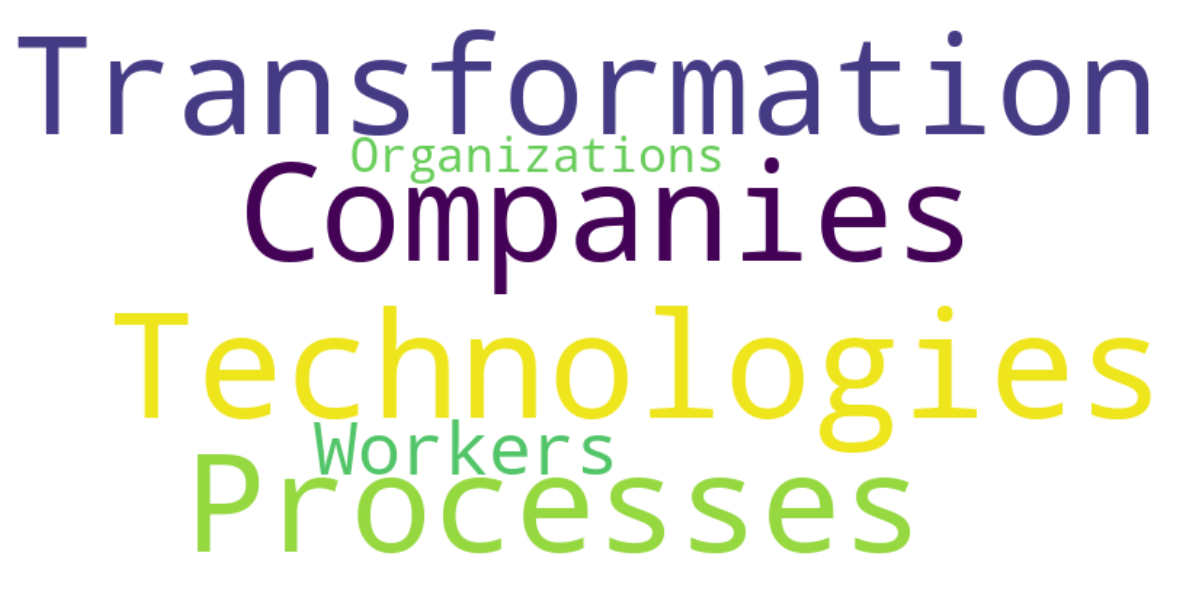

In [23]:
from os.path import join
from wordcloud import WordCloud
import matplotlib.pyplot as plt
words=""
for x in final_words:
  if len(x)>3:
   words=words + ", " +x.capitalize()

# words = [token.text.lower() for token in fitted if not token.is_stop and not token.is_punct]

# Count the frequency of each word
word_freq = Counter(words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()



---


# **7- Deployment**

In [24]:
# !pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.4 MB/s eta 0:00:00


In [28]:
%%writefile app.py
import streamlit as st

st.title("My Notebook Interface")

user_input = st.text_input("Enter your input:")

if st.button("Run"):
    result = f"You entered: {user_input}"
    st.write("Result:", result)

Writing app.py


In [29]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.132.227:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C


In [30]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130

In [7]:
import gradio as gr

# Step 2: Define the function
def echo_input(user_input):
    return f"You entered: {user_input}"

# Step 3: Create the Gradio interface
import gradio as gr

iface = gr.Interface(
    fn=echo_input,                  # The function to call
    inputs=gr.Textbox(label="Enter your input:"),  # Input type (textbox for text input)
    outputs=gr.Textbox(label="Output:"),            # Output type (textbox for text output)
    title="Echo Input Interface",   # Title of the interface
    description="Type something and get it echoed back!"  # Description
)

# Step 4: Launch the interface
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ccf72e111dabecb27.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [13]:
!pip install ipywidgets



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00


In [15]:
import ipywidgets as widgets
from IPython.display import display

# Create widgets
text_input = widgets.Text(
    description='Input:',
    placeholder='Type something here...'
)

submit_button = widgets.Button(
    description='Submit'
)

output = widgets.Output()

# Function to handle button click
def on_button_click(b):
    with output:
        output.clear_output()
        print(f"You entered: {text_input.value}")

# Link the button click event to the function
submit_button.on_click(on_button_click)

# Display the widgets
display(text_input, submit_button, output)

Text(value='', description='Input:', placeholder='Type something here...')

Button(description='Submit', style=ButtonStyle())

Output()

In [16]:
import streamlit as st

# Title of the app
st.title("Simple Streamlit App")

# Text input
user_input = st.text_input("Enter something:")

# Button to submit
if st.button("Submit"):
    st.write(f"You entered: {user_input}")


2024-10-28 14:23:41.153 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 14:23:41.246 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-28 14:23:41.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 14:23:41.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 14:23:41.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 14:23:41.256 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 14:23:41.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 14:23:41.261 Session state does not 